Data Download and Setup

In [1]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import libraries
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load dataset file paths
fileList = glob.glob("/content/drive/MyDrive/CourseProjectDataSet1/DataSet1/*/*.csv")
len(fileList)

516

In [4]:
# Create a DataFrame for file paths
df = pd.DataFrame.from_dict(fileList)
df.rename(columns={0:'Path'}, inplace=True)
df

,Path
0,/content/drive/MyDrive/CourseProjectDataSet1/D...
1,/content/drive/MyDrive/CourseProjectDataSet1/D...
2,/content/drive/MyDrive/CourseProjectDataSet1/D...
3,/content/drive/MyDrive/CourseProjectDataSet1/D...
4,/content/drive/MyDrive/CourseProjectDataSet1/D...
...,...
511,/content/drive/MyDrive/CourseProjectDataSet1/D...
512,/content/drive/MyDrive/CourseProjectDataSet1/D...
513,/content/drive/MyDrive/CourseProjectDataSet1/D...
514,/content/drive/MyDrive/CourseProjectDataSet1/D...


In [5]:
# Extract metadata from file paths
df["file"] = df["Path"].apply(os.path.basename)
df["expID"] = df["file"].apply(lambda x: x.split("_")[0])
df["sensor"] = df["file"].apply(lambda x: os.path.basename(x).split("_")[-2])
df["sensor"] = df["file"].apply(lambda x: x.split("_")[4])
df["frequency"] = df["file"].apply(lambda x: x.split("_")[5])
df

,Path,file,expID,sensor,frequency
0,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Magnetometer,20.000Hz
1,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Pressure,7.330Hz
2,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Gyroscope,100.000Hz
3,/content/drive/MyDrive/CourseProjectDataSet1/D...,11_MetaWear_2019-09-14T14.11.24.625_F1E55E2FE9...,11,Accelerometer,100.000Hz
4,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Accelerometer,100.000Hz
...,...,...,...,...,...
511,/content/drive/MyDrive/CourseProjectDataSet1/D...,7_MetaWear_2019-09-14T14.00.39.875_F1E55E2FE95...,7,Magnetometer,20.000Hz
512,/content/drive/MyDrive/CourseProjectDataSet1/D...,45_MetaWear_2019-09-14T16.16.00.093_F1E55E2FE9...,45,Gyroscope,100.000Hz
513,/content/drive/MyDrive/CourseProjectDataSet1/D...,45_MetaWear_2019-09-14T16.16.00.093_F1E55E2FE9...,45,Accelerometer,100.000Hz
514,/content/drive/MyDrive/CourseProjectDataSet1/D...,45_MetaWear_2019-09-14T16.16.00.093_F1E55E2FE9...,45,Pressure,7.330Hz


Data Preperation

In [6]:
# Convert to integer
df["expID"] = df["expID"].astype(int)

In [7]:
df["expID"].value_counts()

,count
expID,
10,4
11,4
12,4
13,4
14,4
...,...
5,4
6,4
4,4


In [8]:
df.shape

(516, 5)

In [9]:
# Define a mapping of activity numbers per user, since there's no clear pattern in experiment numbers
activity_mapping = {
'User1': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 43: 8, 44: 9, 45: 10, 46: 11},
'User2': {8: 1, 9: 2, 10: 3, 11: 4, 12: 5, 13: 6, 14: 7, 47: 8, 48: 9, 49: 10, 50: 11},
'User3': {15: 1, 16: 2, 17: 3, 18: 4, 19: 5, 20: 6, 21: 7, 51: 8, 52: 9, 53: 10, 54: 11},
'User4': {22: 1, 23: 2, 24: 3, 25: 4, 26: 5, 27: 6, 28: 7, 55: 8, 56: 9, 57: 10, 58: 11},
'User5': {29: 1, 30: 2, 31: 3, 32: 4, 33: 5, 34: 6, 35: 7, 59: 8, 60: 9, 61: 10, 62: 11},
'User6': {36: 1, 37: 2, 38: 3, 39: 4, 40: 5, 41: 6, 42: 7, 63: 8, 64: 9, 65: 10, 66: 11},
'User7': {67: 1, 68: 2, 69: 3, 70: 4, 71: 5, 72: 6, 73: 7, 74: 8, 75: 9, 76: 10, 77: 11},
'User8': {78: 1, 79: 2, 80: 3, 81: 4, 82: 5, 83: 6, 84: 7, 85: 8, 86: 9, 87: 10, 88: 11},
'User9': {89: 1, 90: 2, 91: 3, 92: 4, 93: 5, 94: 6, 95: 7, 96: 8, 97: 9, 98: 10, 99: 11},
'User10': {100: 1, 101: 2, 102: 3, 103: 4, 104: 5, 105: 6, 106: 7, 107: 8, 108: 9, 109: 10, 110: 11},
'User11': {111: 1, 112: 2, 113: 3, 114: 4, 115: 5, 116: 6, 117: 7, 118: 8, 119: 9, 120: 10, 121: 11},
'User12': {122: 1, 123: 2, 124: 3, 125: 4, 126: 5, 127: 6, 128: 7, 129: 8, 130: 9, 131: 10, 132: 11},
}

In [10]:
# Define mapping for experiment numbers to activity names
expDict = {1: "sitting and reading a book", 2: "sitting and writing a notebook",
           3: "sitting and typing", 4: "sitting and browsing", 5: "moving head while sitting", 6: "moving chair while sitting",
           7: "stand up from sitting", 8: "standing", 9:"walking", 10: "running", 11: "taking stairs"}

In [11]:
# Function to get activity number from expID
def exp_No(expID):
  expID = int(expID)
  if expID % 11 == 0:
    return 11
  return expID % 11

# Function to get activity name from exp_No
def exp_Name(exp_No):
  return expDict[exp_No]

In [12]:
# Map experiment IDs to activity names
df["exp_No"] = df["expID"].apply(exp_No)
df["exp_Name"] = df["exp_No"].apply(exp_Name)
df

,Path,file,expID,sensor,frequency,exp_No,exp_Name
0,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Magnetometer,20.000Hz,10,running
1,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Pressure,7.330Hz,10,running
2,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Gyroscope,100.000Hz,10,running
3,/content/drive/MyDrive/CourseProjectDataSet1/D...,11_MetaWear_2019-09-14T14.11.24.625_F1E55E2FE9...,11,Accelerometer,100.000Hz,11,taking stairs
4,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Accelerometer,100.000Hz,10,running
...,...,...,...,...,...,...,...
511,/content/drive/MyDrive/CourseProjectDataSet1/D...,7_MetaWear_2019-09-14T14.00.39.875_F1E55E2FE95...,7,Magnetometer,20.000Hz,7,stand up from sitting
512,/content/drive/MyDrive/CourseProjectDataSet1/D...,45_MetaWear_2019-09-14T16.16.00.093_F1E55E2FE9...,45,Gyroscope,100.000Hz,1,sitting and reading a book
513,/content/drive/MyDrive/CourseProjectDataSet1/D...,45_MetaWear_2019-09-14T16.16.00.093_F1E55E2FE9...,45,Accelerometer,100.000Hz,1,sitting and reading a book
514,/content/drive/MyDrive/CourseProjectDataSet1/D...,45_MetaWear_2019-09-14T16.16.00.093_F1E55E2FE9...,45,Pressure,7.330Hz,1,sitting and reading a book


Data Analysis & Sensor Data Visualization

In [13]:
# Create separate DataFrames for each activity
activity_dfs = {activity: df[df["exp_Name"] == activity] for activity in df["exp_Name"].unique()}

# Display summary of activity counts
activity_counts = {activity: len(df) for activity, df in activity_dfs.items()}
print("Activity-specific DataFrames created. Summary of activity counts:")
display(activity_counts)

# Show first few rows of a sample activity
example_activity = list(activity_dfs.keys())[0]
print(f"First 5 rows of {example_activity}:")
display(activity_dfs[example_activity].head())

Activity-specific DataFrames created. Summary of activity counts:


{'running': 48,
 'taking stairs': 48,
 'sitting and reading a book': 44,
 'sitting and writing a notebook': 48,
 'sitting and typing': 48,
 'sitting and browsing': 48,
 'moving head while sitting': 44,
 'moving chair while sitting': 48,
 'standing': 44,
 'walking': 48,
 'stand up from sitting': 48}

First 5 rows of running:


,Path,file,expID,sensor,frequency,exp_No,exp_Name
0,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Magnetometer,20.000Hz,10,running
1,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Pressure,7.330Hz,10,running
2,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Gyroscope,100.000Hz,10,running
4,/content/drive/MyDrive/CourseProjectDataSet1/D...,10_MetaWear_2019-09-14T14.09.43.486_F1E55E2FE9...,10,Accelerometer,100.000Hz,10,running
69,/content/drive/MyDrive/CourseProjectDataSet1/D...,21_MetaWear_2019-09-14T14.33.29.527_F1E55E2FE9...,21,Magnetometer,20.000Hz,10,running


In [14]:
# Function to retrieve the user associated with a given expID
def get_user_from_expID(expID):
    for user, mapping in activity_mapping.items():
        if expID in mapping:
            return user
    return "Unknown"

# Apply the function to create a new column "User_ID" in the dataframe
df["User_ID"] = df["expID"].apply(get_user_from_expID)

In [15]:
# Function to retrieve the activity number associated with a given expID
def get_exp_no(expID):
    for user, mapping in activity_mapping.items():
        if expID in mapping:
            return mapping[expID]
    return None

# Apply the function to create a new column "exp_No" in the dataframe
df["exp_No"] = df["expID"].apply(get_exp_no)

In [16]:
# Map activity numbers to activity names using the expDict dictionary
df["exp_Name"] = df["exp_No"].map(expDict)

In [17]:
# Display the first five rows of the dataframe with key experiment details
print(df[["expID", "User_ID", "exp_No", "exp_Name"]].head())

   expID User_ID  exp_No              exp_Name
0     10   User2       3    sitting and typing
1     10   User2       3    sitting and typing
2     10   User2       3    sitting and typing
3     11   User2       4  sitting and browsing
4     10   User2       3    sitting and typing


In [18]:
def plot_all_sensors(df, activity_name, user_id):
    # Ensure "exp_Name" exists
    if "exp_Name" not in df.columns:
        print("Error: 'exp_Name' column is missing!")
        return

    # Select data for the specific activity and user
    activity_data = df[(df["exp_Name"] == activity_name) & (df["User_ID"] == user_id)]
    if activity_data.empty:
        print(f"Warning: No data found for '{activity_name}' for {user_id}")
        return

    # Ensure "sensor" column exists
    if "sensor" not in df.columns:
        print("Error: 'sensor' column is missing!")
        return

    # Create a 2x2 subplot layout for visualizing sensor data
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Sensor Data for {activity_name} - User: {user_id}", fontsize=14)

    # Accelerometer
    accel_data = activity_data[activity_data["sensor"] == "Accelerometer"]
    if not accel_data.empty:
        accel_file = accel_data.iloc[0]["Path"]
        data_acc = pd.read_csv(accel_file)
        data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
        axes[0, 0].plot(data_acc['elapsed'], data_acc[['x', 'y', 'z']])
        axes[0, 0].set_title("Accelerometer")

    # Gyroscope
    gyro_data = activity_data[activity_data["sensor"] == "Gyroscope"]
    if not gyro_data.empty:
        gyro_file = gyro_data.iloc[0]["Path"]
        data_gyro = pd.read_csv(gyro_file)
        data_gyro.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
        axes[0, 1].plot(data_gyro['elapsed'], data_gyro[['x', 'y', 'z']])
        axes[0, 1].set_title("Gyroscope")

    # Magnetometer
    mag_data = activity_data[activity_data["sensor"] == "Magnetometer"]
    if not mag_data.empty:
        mag_file = mag_data.iloc[0]["Path"]
        data_magno = pd.read_csv(mag_file)
        data_magno.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
        axes[1, 0].plot(data_magno['elapsed'], data_magno[['x', 'y', 'z']])
        axes[1, 0].set_title("Magnetometer")

    # Pressure Sensor
    pres_data = activity_data[activity_data["sensor"] == "Pressure"]
    if not pres_data.empty:
        pres_file = pres_data.iloc[0]["Path"]
        data_pres = pd.read_csv(pres_file)
        data_pres.columns = ['timestamp', 'time', 'elapsed', 'pressure']
        axes[1, 1].plot(data_pres['elapsed'], data_pres['pressure'])
        axes[1, 1].set_title("Pressure Sensor")

    plt.tight_layout()
    plt.show()


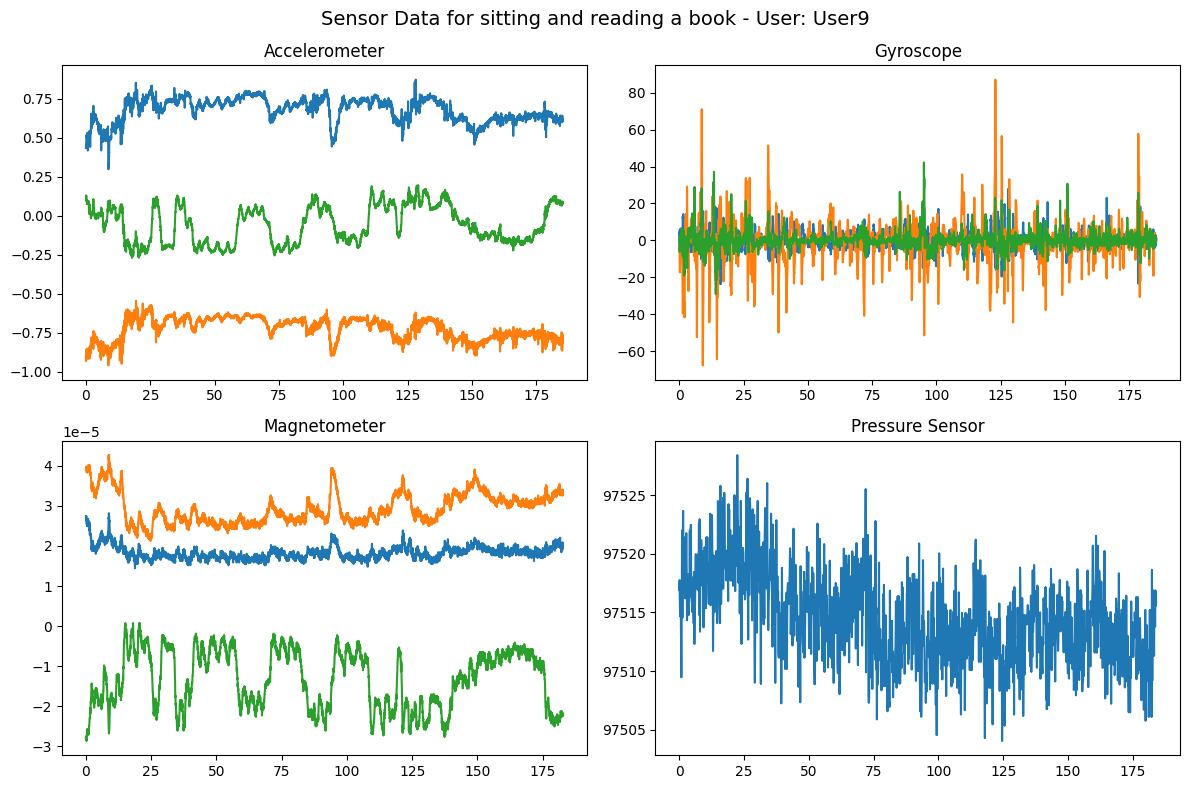

In [19]:
# Call the function to plot sensor data for "sitting and reading a book" performed by "User9"
plot_all_sensors(df, "sitting and reading a book", "User9")

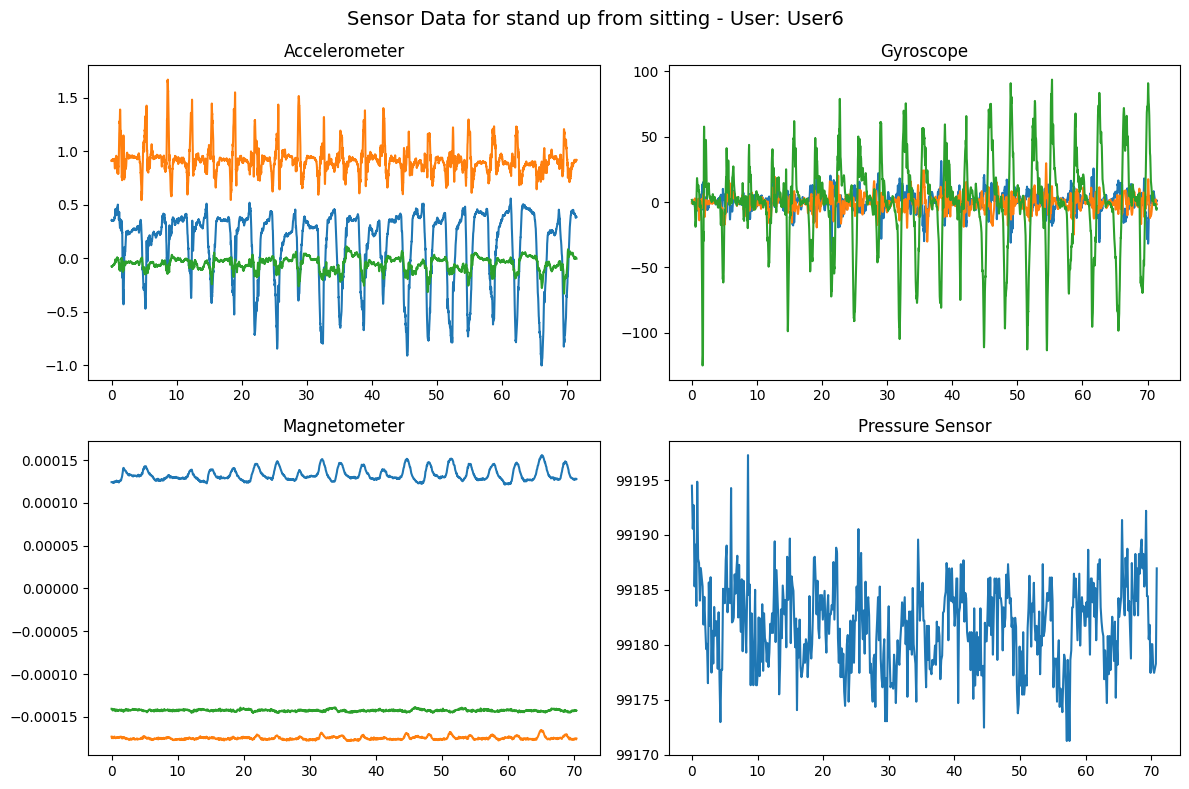

In [20]:
plot_all_sensors(df, "stand up from sitting", "User6")

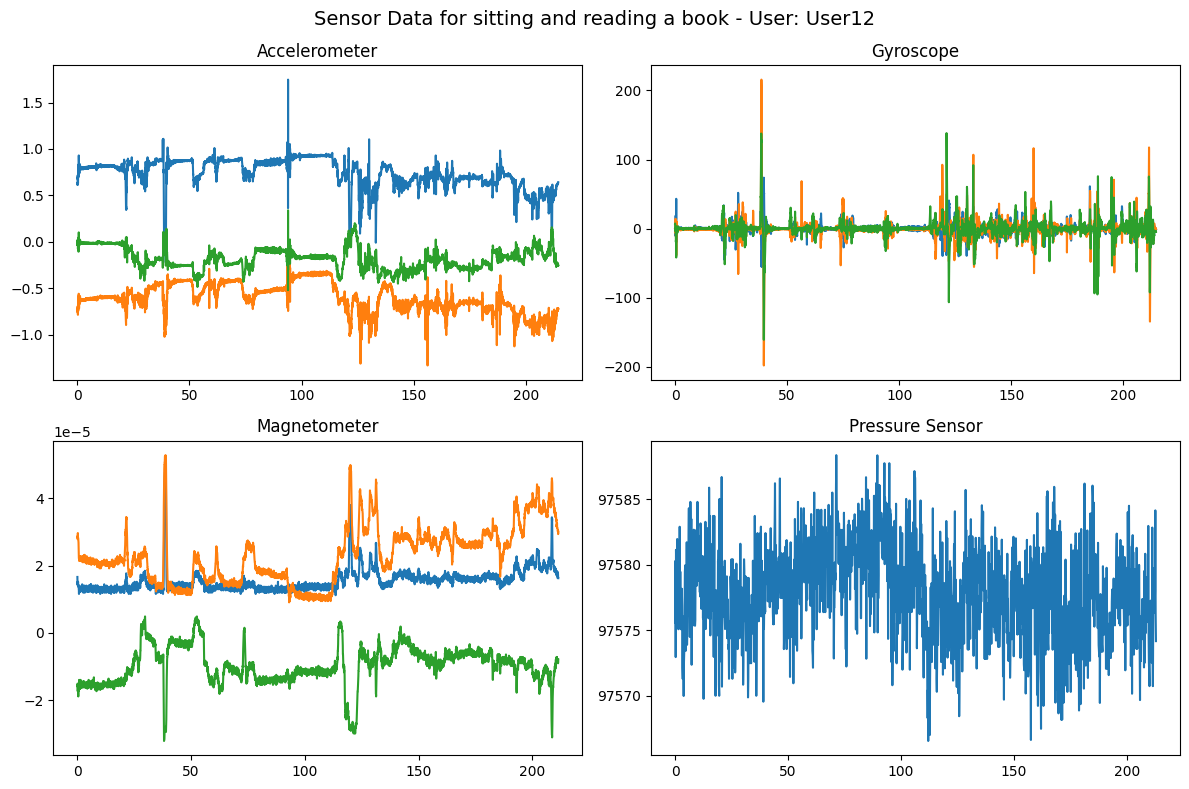

In [21]:
plot_all_sensors(df, "sitting and reading a book", "User12")

Windowing & Feature Extraction

In [22]:
# Function to compute statistical features
def compute_features(window_acc, window_gyr):
    """
    Compute statistical features for a given window of sensor data.
    """
    features = np.hstack([
        # Accelerometer Features
        np.mean(window_acc, axis=0),  # Mean
        np.var(window_acc, axis=0),  # Variance
        np.median(window_acc, axis=0),  # Median
        np.std(window_acc, axis=0),  # Standard Deviation
        np.min(window_acc, axis=0),  # Minimum
        np.max(window_acc, axis=0),  # Maximum
        np.ptp(window_acc, axis=0),  # Range (Peak-to-Peak)
        np.sum(window_acc, axis=0),  # Sum per axis
        np.abs(window_acc).sum(axis=0),  # Absolute Sum per axis
        np.sum(window_acc, axis=0).sum(),  # acc_sum_xyz (Total sum of all axes)
        np.abs(window_acc).sum(axis=0).sum(),  # acc_abssum (Total absolute sum)

        # Gyroscope Features
        np.mean(window_gyr, axis=0),  # Mean
        np.var(window_gyr, axis=0),  # Variance
        np.median(window_gyr, axis=0),  # Median
        np.std(window_gyr, axis=0),  # Standard Deviation
        np.min(window_gyr, axis=0),  # Minimum
        np.max(window_gyr, axis=0),  # Maximum
        np.ptp(window_gyr, axis=0),  # Range (Peak-to-Peak)
        np.sum(window_gyr, axis=0),  # Sum per axis
        np.abs(window_gyr).sum(axis=0),  # Absolute Sum per axis
        np.sum(window_gyr, axis=0).sum(),  # gyr_sum_xyz (Total sum of all axes)
        np.abs(window_gyr).sum(axis=0).sum()  # gyr_abssum (Total absolute sum)
    ])
    return features

# feature columns
columns = [
    # Accelerometer Features
    "mean_acc_x", "mean_acc_y", "mean_acc_z",
    "var_acc_x", "var_acc_y", "var_acc_z",
    "median_acc_x", "median_acc_y", "median_acc_z",
    "std_acc_x", "std_acc_y", "std_acc_z",
    "min_acc_x", "min_acc_y", "min_acc_z",
    "max_acc_x", "max_acc_y", "max_acc_z",
    "range_acc_x", "range_acc_y", "range_acc_z",
    "sum_acc_x", "sum_acc_y", "sum_acc_z",
    "abs_sum_acc_x", "abs_sum_acc_y", "abs_sum_acc_z",
    "acc_sum_xyz","acc_abssum",

    # Gyroscope Features
    "mean_gyr_x", "mean_gyr_y", "mean_gyr_z",
    "var_gyr_x", "var_gyr_y", "var_gyr_z",
    "median_gyr_x", "median_gyr_y", "median_gyr_z",
    "std_gyr_x", "std_gyr_y", "std_gyr_z",
    "min_gyr_x", "min_gyr_y", "min_gyr_z",
    "max_gyr_x", "max_gyr_y", "max_gyr_z",
    "range_gyr_x", "range_gyr_y", "range_gyr_z",
    "sum_gyr_x", "sum_gyr_y", "sum_gyr_z",
    "abs_sum_gyr_x", "abs_sum_gyr_y", "abs_sum_gyr_z",
    "gyr_sum_xyz","gyr_abssum",

    "Activity_Label"
]


# Define window sizes and overlap conditions
window_sizes = [100, 200, 300, 400, 500]
overlaps = [0, 50]

skipped_exp = 0  # Track skipped experiments

# Main loop
# Fix missing label before feature extraction
df["Activity_Label"] = df["exp_No"]
for expID in df["expID"].value_counts().index:
    temp_df = df[df["expID"] == expID]

    # Load accelerometer and gyroscope data
    acc_file = temp_df[temp_df["sensor"] == "Accelerometer"]
    gyr_file = temp_df[temp_df["sensor"] == "Gyroscope"]

    if acc_file.empty or gyr_file.empty:
        skipped_exp += 1
        continue  # Skip if missing data

    acc_data = pd.read_csv(acc_file.iloc[0, 0])
    acc_data = acc_data[['x-axis (g)', 'y-axis (g)', 'z-axis (g)']].to_numpy()

    gyr_data = pd.read_csv(gyr_file.iloc[0, 0])
    gyr_data = gyr_data[['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)']].to_numpy()

    # Correctly handle missing activity labels
    label = int(temp_df["Activity_Label"].iloc[0])

    for window_size in window_sizes:
        for overlap in overlaps:
            step_size = window_size if overlap == 0 else window_size // 2
            buffer = []

            for i in range(0, len(acc_data) - window_size + 1, step_size):
                window_acc = acc_data[i:i+window_size]
                window_gyr = gyr_data[i:i+window_size]

                # Compute features and store in buffer
                buffer.append(np.append(compute_features(window_acc, window_gyr), label))

            # Convert buffer to DataFrame
            df_result = pd.DataFrame(buffer, columns=columns)

            # Save CSV correctly without overwriting
            file_path = f"/content/drive/MyDrive/CourseProjectDataSet1/Feature_W{window_size}_Olap{overlap}.csv"
            df_result.to_csv(file_path, mode='a', index=False, header=not os.path.exists(file_path))

print(f"Feature extraction complete. CSVs saved for each window size and overlap.")

Feature extraction complete. CSVs saved for each window size and overlap.


In [23]:
# Display the first five rows of the extracted feature dataset
df_result.head()

,mean_acc_x,mean_acc_y,mean_acc_z,var_acc_x,var_acc_y,var_acc_z,median_acc_x,median_acc_y,median_acc_z,std_acc_x,...,range_gyr_z,sum_gyr_x,sum_gyr_y,sum_gyr_z,abs_sum_gyr_x,abs_sum_gyr_y,abs_sum_gyr_z,gyr_sum_xyz,gyr_abssum,Activity_Label
0,0.150910,0.863952,-0.378672,0.040029,0.473702,0.080848,0.1285,0.8340,-0.3945,0.200072,...,182.683,-406.535,2780.055,633.478,6761.157,12756.773,11151.162,3006.998,30669.092,10.0
1,0.229828,0.879716,-0.369206,0.047750,0.845666,0.127281,0.1845,0.6190,-0.2870,0.218518,...,170.976,-62.746,-220.970,1069.875,9651.524,7908.418,11662.691,786.159,29222.633,10.0
2,0.246792,0.889240,-0.369430,0.047472,0.822503,0.130031,0.1970,0.6410,-0.2995,0.217881,...,173.293,-149.759,556.832,697.257,10247.801,7857.694,11763.731,1104.330,29869.226,10.0
3,0.246152,0.881432,-0.339894,0.053235,0.781365,0.124717,0.1910,0.6650,-0.2675,0.230727,...,182.317,2019.392,17760.191,-2909.451,11801.582,21107.143,11296.159,16870.132,44204.884,10.0
4,0.317388,0.876418,-0.312328,0.082913,0.765412,0.103105,0.2310,0.6815,-0.2540,0.287947,...,129.390,2929.099,17203.368,-4194.509,12677.385,21467.870,9363.777,15937.958,43509.032,10.0


In [24]:
# Define the directory path where the feature files are stored
feature_file_path = "/content/drive/MyDrive/CourseProjectDataSet1/"

# List of required feature files
feature_files = [
    "Feature_W100_Olap50.csv",
    "Feature_W200_Olap50.csv",
    "Feature_W300_Olap0.csv",
    "Feature_W400_Olap0.csv",
    "Feature_W500_Olap50.csv"
]

# Dictionary to store data samples and row counts
data_samples = {}
row_counts = []

# Read and display first 10 rows for each file
for file in feature_files:
    file_path = os.path.join(feature_file_path, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        data_samples[file] = df.head(10)  # Store first 10 rows
        row_counts.append({"File Name": file, "Row Count": len(df)})  # Store row count
    else:
        print(f"File not found: {file_path}")

# Display each DataFrame sample
for file, df in data_samples.items():
    print(f"\nFirst 10 rows of {file}:")
    display(df)


First 10 rows of Feature_W100_Olap50.csv:


,mean_acc_x,mean_acc_y,mean_acc_z,var_acc_x,var_acc_y,var_acc_z,median_acc_x,median_acc_y,median_acc_z,std_acc_x,...,range_gyr_z,sum_gyr_x,sum_gyr_y,sum_gyr_z,abs_sum_gyr_x,abs_sum_gyr_y,abs_sum_gyr_z,gyr_sum_xyz,gyr_abssum,Activity_Label
0,0.03685,0.93372,-0.25560,0.000017,0.000010,0.000026,0.0370,0.934,-0.2545,0.004129,...,2.134,-20.909,-19.703,54.335,47.139,47.031,58.971,13.723,153.141,3.0
1,0.04830,0.93498,-0.24954,0.000112,0.000010,0.000026,0.0420,0.935,-0.2510,0.010584,...,4.207,-61.530,287.498,133.963,74.340,317.510,137.379,359.931,529.229,3.0
2,0.06886,0.93623,-0.23984,0.000240,0.000011,0.000094,0.0695,0.936,-0.2370,0.015479,...,3.597,-58.604,360.921,172.557,73.610,376.655,172.557,474.874,622.822,3.0
3,0.08406,0.93640,-0.23442,0.000061,0.000016,0.000021,0.0840,0.936,-0.2350,0.007810,...,2.927,55.307,12.869,59.507,76.897,131.289,93.545,127.683,301.731,3.0
4,0.08869,0.93478,-0.24080,0.000030,0.000016,0.000031,0.0890,0.935,-0.2410,0.005480,...,2.683,87.208,-86.720,22.006,90.136,86.720,67.878,22.494,244.734,3.0
5,0.08873,0.93435,-0.24387,0.000032,0.000012,0.000027,0.0880,0.934,-0.2440,0.005697,...,1.951,33.609,-51.592,32.809,73.613,72.698,53.793,14.826,200.104,3.0
6,0.09198,0.93408,-0.24327,0.000064,0.000025,0.000027,0.0915,0.935,-0.2430,0.007997,...,4.756,41.766,-9.022,31.156,88.114,76.108,92.386,63.900,256.608,3.0
7,0.09323,0.93314,-0.24618,0.000053,0.000025,0.000034,0.0930,0.934,-0.2450,0.007283,...,4.756,54.329,-28.715,24.568,86.165,91.775,95.802,50.182,273.742,3.0
8,0.09228,0.93301,-0.24822,0.000044,0.000026,0.000035,0.0920,0.933,-0.2485,0.006662,...,3.841,35.002,-26.153,35.309,84.646,90.925,73.853,44.158,249.424,3.0
9,0.09818,0.93244,-0.24600,0.000043,0.000039,0.000038,0.0985,0.932,-0.2470,0.006578,...,3.963,23.173,1.648,47.074,98.301,95.076,92.450,71.895,285.827,3.0



First 10 rows of Feature_W200_Olap50.csv:


,mean_acc_x,mean_acc_y,mean_acc_z,var_acc_x,var_acc_y,var_acc_z,median_acc_x,median_acc_y,median_acc_z,std_acc_x,...,range_gyr_z,sum_gyr_x,sum_gyr_y,sum_gyr_z,abs_sum_gyr_x,abs_sum_gyr_y,abs_sum_gyr_z,gyr_sum_xyz,gyr_abssum,Activity_Label
0,0.052855,0.934975,-0.247720,0.000384,0.000012,0.000122,0.042,0.935,-0.251,0.019608,...,4.207,-79.513,341.218,226.892,120.749,423.686,231.528,488.597,775.963,3.0
1,0.078775,0.935505,-0.240320,0.000233,0.000014,0.000063,0.083,0.935,-0.240,0.015268,...,5.122,28.604,274.201,194.563,163.746,463.375,240.435,497.368,867.556,3.0
2,0.090335,0.934430,-0.242035,0.000050,0.000021,0.000030,0.090,0.935,-0.242,0.007050,...,4.756,128.974,-95.742,53.162,178.250,162.828,160.264,86.394,501.342,3.0
3,0.092130,0.933545,-0.245745,0.000054,0.000026,0.000037,0.092,0.934,-0.246,0.007362,...,4.756,76.768,-35.175,66.465,172.760,167.033,166.239,108.058,506.032,3.0
4,0.092620,0.927430,-0.248195,0.000406,0.000305,0.000046,0.096,0.931,-0.249,0.020157,...,103.658,193.721,-225.846,-1173.111,292.877,339.650,1349.351,-1205.236,1981.878,3.0
5,0.007125,0.926505,-0.255990,0.013289,0.000486,0.000215,0.041,0.929,-0.253,0.115278,...,159.024,-34.508,275.367,-356.652,492.804,879.035,3306.410,-115.793,4678.249,3.0
6,-0.006790,0.933275,-0.253570,0.010753,0.000221,0.000257,0.050,0.934,-0.250,0.103696,...,143.598,-238.595,391.285,993.417,420.187,741.779,2182.321,1146.107,3344.287,3.0
7,0.068780,0.934760,-0.244415,0.000084,0.000033,0.000130,0.068,0.935,-0.246,0.009178,...,6.769,61.579,-174.328,207.263,291.349,231.172,227.393,94.514,749.914,3.0
8,0.072835,0.933460,-0.247785,0.000038,0.000026,0.000120,0.073,0.933,-0.251,0.006159,...,2.866,136.649,-178.788,83.548,213.861,217.942,109.046,41.409,540.849,3.0
9,0.072975,0.932655,-0.250615,0.000028,0.000017,0.000019,0.073,0.933,-0.252,0.005332,...,3.110,55.130,-152.566,46.655,116.006,195.750,84.231,-50.781,395.987,3.0



First 10 rows of Feature_W300_Olap0.csv:


,mean_acc_x,mean_acc_y,mean_acc_z,var_acc_x,var_acc_y,var_acc_z,median_acc_x,median_acc_y,median_acc_z,std_acc_x,...,range_gyr_z,sum_gyr_x,sum_gyr_y,sum_gyr_z,abs_sum_gyr_x,abs_sum_gyr_y,abs_sum_gyr_z,gyr_sum_xyz,gyr_abssum,Activity_Label
0,0.064800,0.934910,-0.245413,0.000552,0.000013,0.000102,0.0695,0.935,-0.2455,0.023488,...,5.122,7.695,254.498,248.898,210.885,510.406,299.406,511.091,1020.697,3.0
1,0.092407,0.929647,-0.246553,0.000292,0.000222,0.000045,0.0940,0.933,-0.2470,0.017096,...,104.390,235.487,-234.868,-1141.955,380.991,415.758,1441.737,-1141.336,2238.486,3.0
2,0.019617,0.933560,-0.250880,0.008582,0.000160,0.000254,0.0610,0.934,-0.2500,0.092638,...,143.598,-131.648,300.732,1059.031,575.922,861.482,2258.305,1228.115,3695.709,3.0
3,0.073497,0.932837,-0.249963,0.000039,0.000015,0.000025,0.0730,0.933,-0.2510,0.006238,...,4.208,72.938,-233.302,109.592,187.480,298.568,157.660,-50.772,643.708,3.0
4,0.076620,0.932983,-0.249483,0.000056,0.000016,0.000040,0.0770,0.933,-0.2490,0.007516,...,3.109,37.565,-193.412,40.243,198.823,301.606,171.749,-115.604,672.178,3.0
5,0.081530,0.932877,-0.248580,0.000098,0.000027,0.000062,0.0810,0.933,-0.2480,0.009921,...,5.610,59.266,-219.741,187.087,289.184,390.509,296.615,26.612,976.308,3.0
6,0.099110,0.931257,-0.248517,0.000126,0.000035,0.000114,0.0990,0.931,-0.2500,0.011236,...,7.317,24.571,-261.473,86.649,354.727,460.635,333.519,-150.253,1148.881,3.0
7,0.094763,0.931783,-0.248480,0.000099,0.000023,0.000072,0.0970,0.932,-0.2500,0.009930,...,4.329,120.915,-215.862,116.714,248.627,376.848,282.588,21.767,908.063,3.0
8,0.097710,0.930720,-0.252623,0.000049,0.000022,0.000063,0.0980,0.931,-0.2540,0.006976,...,5.183,-1.400,-363.609,142.275,311.428,366.049,260.463,-222.734,937.940,3.0
9,0.100373,0.930490,-0.251087,0.000132,0.000034,0.000155,0.0990,0.931,-0.2500,0.011485,...,4.695,154.582,8.056,78.783,381.790,444.656,247.963,241.421,1074.409,3.0



First 10 rows of Feature_W400_Olap0.csv:


,mean_acc_x,mean_acc_y,mean_acc_z,var_acc_x,var_acc_y,var_acc_z,median_acc_x,median_acc_y,median_acc_z,std_acc_x,...,range_gyr_z,sum_gyr_x,sum_gyr_y,sum_gyr_z,abs_sum_gyr_x,abs_sum_gyr_y,abs_sum_gyr_z,gyr_sum_xyz,gyr_abssum,Activity_Label
0,0.071595,0.934702,-0.244877,0.000568,0.000016,0.000084,0.0820,0.935,-0.2440,0.023839,...,5.548,49.461,245.476,280.054,298.999,586.514,391.792,574.991,1277.305,3.0
1,0.042915,0.930353,-0.250883,0.008050,0.000272,0.000159,0.0785,0.932,-0.2490,0.089723,...,159.024,-44.874,165.439,-179.694,713.064,1081.429,3531.672,-59.129,5326.165,3.0
2,0.073230,0.933160,-0.248847,0.000043,0.000021,0.000074,0.0730,0.933,-0.2510,0.006585,...,4.208,179.885,-323.855,175.206,343.215,418.271,233.644,31.236,995.130,3.0
3,0.076870,0.932957,-0.249330,0.000059,0.000016,0.000039,0.0770,0.933,-0.2490,0.007667,...,3.780,46.528,-255.422,110.736,255.604,389.236,253.344,-98.158,898.184,3.0
4,0.091942,0.932135,-0.247882,0.000198,0.000037,0.000118,0.0910,0.932,-0.2490,0.014075,...,7.317,98.909,-337.861,187.934,512.607,664.115,447.604,-51.018,1624.326,3.0
5,0.095205,0.931582,-0.249082,0.000092,0.000024,0.000059,0.0970,0.932,-0.2500,0.009593,...,6.281,96.880,-297.205,132.023,323.150,476.247,383.523,-68.302,1182.920,3.0
6,0.098212,0.930922,-0.251330,0.000048,0.000023,0.000068,0.0980,0.931,-0.2520,0.006928,...,5.183,44.827,-374.154,123.490,413.391,440.390,308.650,-205.837,1162.431,3.0
7,0.102560,0.929103,-0.254682,0.000136,0.000033,0.000129,0.1020,0.929,-0.2540,0.011662,...,4.756,139.217,-81.756,90.148,490.811,617.400,370.896,147.609,1479.107,3.0
8,0.101190,0.927473,-0.261785,0.000058,0.000027,0.000040,0.1010,0.927,-0.2610,0.007585,...,4.878,96.594,-223.708,65.009,324.796,452.164,268.359,-62.105,1045.319,3.0
9,0.099902,0.926033,-0.265622,0.000052,0.000029,0.000078,0.1010,0.926,-0.2665,0.007212,...,5.427,112.744,-250.182,99.703,384.862,439.970,312.795,-37.735,1137.627,3.0



First 10 rows of Feature_W500_Olap50.csv:


,mean_acc_x,mean_acc_y,mean_acc_z,var_acc_x,var_acc_y,var_acc_z,median_acc_x,median_acc_y,median_acc_z,std_acc_x,...,range_gyr_z,sum_gyr_x,sum_gyr_y,sum_gyr_z,abs_sum_gyr_x,abs_sum_gyr_y,abs_sum_gyr_z,gyr_sum_xyz,gyr_abssum,Activity_Label
0,0.075732,0.934364,-0.245546,0.000532,0.000019,0.000076,0.0850,0.935,-0.246,0.023064,...,5.548,84.463,219.323,315.363,383.645,677.439,465.645,619.149,1526.729,3.0
1,0.054744,0.930816,-0.249316,0.006939,0.000221,0.000137,0.0885,0.933,-0.248,0.083300,...,159.024,86.238,155.547,-169.631,764.538,1132.177,3607.601,72.154,5504.316,3.0
2,0.045010,0.931064,-0.250176,0.006313,0.000224,0.000170,0.0700,0.933,-0.250,0.079453,...,159.024,56.773,12.804,-131.455,842.279,1208.446,3566.865,-61.878,5617.590,3.0
3,0.073730,0.933292,-0.248948,0.000058,0.000023,0.000077,0.0740,0.933,-0.251,0.007639,...,4.208,108.052,-377.078,215.566,460.670,527.730,310.970,-53.460,1299.370,3.0
4,0.075422,0.932934,-0.249654,0.000055,0.000017,0.000034,0.0750,0.933,-0.250,0.007446,...,4.451,80.801,-338.479,131.901,328.177,501.935,296.347,-125.777,1126.459,3.0
5,0.077970,0.933002,-0.248524,0.000067,0.000019,0.000040,0.0780,0.933,-0.248,0.008188,...,5.183,72.436,-325.113,177.144,366.770,501.987,358.412,-75.533,1227.169,3.0
6,0.089078,0.932284,-0.248080,0.000204,0.000032,0.000101,0.0870,0.932,-0.249,0.014293,...,7.317,107.872,-399.871,258.427,569.388,751.745,529.199,-33.572,1850.332,3.0
7,0.095368,0.932230,-0.247000,0.000144,0.000035,0.000107,0.0960,0.932,-0.248,0.011980,...,7.317,132.555,-445.491,211.774,581.629,834.417,575.232,-101.162,1991.278,3.0
8,0.095570,0.931286,-0.250428,0.000082,0.000024,0.000059,0.0970,0.931,-0.251,0.009038,...,6.281,129.503,-379.591,142.276,402.245,560.219,440.854,-107.812,1403.318,3.0
9,0.098400,0.930572,-0.252294,0.000052,0.000021,0.000057,0.0990,0.931,-0.253,0.007223,...,5.183,46.907,-453.557,174.662,457.439,546.627,408.484,-231.988,1412.550,3.0


In [36]:
# Convert row count summary to a DataFrame and display
row_counts_df = pd.DataFrame(row_counts)

# Show row count summary table
from google.colab.data_table import DataTable
DataTable(row_counts_df)

,File Name,Row Count
0,Feature_W100_Olap50.csv,29495
1,Feature_W200_Olap50.csv,14647
2,Feature_W300_Olap0.csv,4883
3,Feature_W400_Olap0.csv,3644
4,Feature_W500_Olap50.csv,5744


In [26]:
#Feature files loaded, normalized, and splits.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the feature file names and path
feature_file_path = "/content/drive/MyDrive/CourseProjectDataSet1/"

feature_files = {
    "W100_O0": "Feature_W100_Olap0.csv",
    "W100_O50": "Feature_W100_Olap50.csv",
    "W200_O0": "Feature_W200_Olap0.csv",
    "W200_O50": "Feature_W200_Olap50.csv",
    "W300_O0": "Feature_W300_Olap0.csv",
    "W300_O50": "Feature_W300_Olap50.csv",
    "W400_O0": "Feature_W400_Olap0.csv",
    "W400_O50": "Feature_W400_Olap50.csv",
    "W500_O0": "Feature_W500_Olap0.csv",
    "W500_O50": "Feature_W500_Olap50.csv"
}

# Dictionary to store splits for modeling
data_splits = {}

for name, file in feature_files.items():
    file_path = os.path.join(feature_file_path, file)
    df = pd.read_csv(file_path)

    # Split into features and labels
    X = df.drop(columns=["Activity_Label"])
    y = df["Activity_Label"]

    # Normalize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create both 80/20 and 70/30 train-test splits
    X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Store splits
    data_splits[name] = {
        "80/20": (X_train_80, X_test_20, y_train_80, y_test_20),
        "70/30": (X_train_70, X_test_30, y_train_70, y_test_30)
    }

print("Feature files loaded, normalized, and split.")


Feature files loaded, normalized, and split.


In [27]:
# Check unique values in each feature file label column
for name, file in feature_files.items():
    df = pd.read_csv(os.path.join(feature_file_path, file))
    print(f"{name}: {df['Activity_Label'].unique()}")


W100_O0: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W100_O50: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W200_O0: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W200_O50: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W300_O0: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W300_O50: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W400_O0: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W400_O50: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W500_O0: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]
W500_O50: [ 3.  4.  5.  6.  7.  9.  8. 10. 11.  1.  2.]


Executive Summary

This project evaluates 10 machine learning models on a sensor-based activity recognition dataset using 5 different feature sets. We applied preprocessing, feature extraction through windowing, hyperparameter tuning, and cross-validation. Each model was evaluated using accuracy, precision, recall, F1-score, and ROC-AUC. Random Forest emerged as the best-performing model in terms of F1-score, followed closely by XGBoost and ANN.

Key techniques include:
- Windowing for temporal segmentation
- Stratified and K-Fold cross-validation
- Hyperparameter optimization using GridSearchCV and RandomizedSearchCV
- Performance logging and visual comparison

The final results and tuning strategies are summarized and exported to CSV and PDF.


In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Set hyperparameter grid
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'saga']
}

# Store results
logreg_results = []

# Loop through feature sets
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid = GridSearchCV(LogisticRegression(max_iter=30000, tol=1e-3), logreg_params, cv=skf, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        # Save results
        logreg_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f" {name} | Split: {ratio} done. Best Params: {grid.best_params_} | Accuracy: {accuracy:.4f}")


 W100_O0 | Split: 80/20 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.5555
 W100_O0 | Split: 70/30 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.5599
 W100_O50 | Split: 80/20 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.5701
 W100_O50 | Split: 70/30 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.5740
 W200_O0 | Split: 80/20 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.6145
 W200_O0 | Split: 70/30 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.6162
 W200_O50 | Split: 80/20 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.5956
 W200_O50 | Split: 70/30 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accuracy: 0.6016
 W300_O0 | Split: 80/20 done. Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} | Accur

In [29]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Set hyperparameter grid
dt_params = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Store results
dt_results = []

# Loop through feature sets and splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=skf, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        # Save results
        dt_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f" {name} | Split: {ratio} done. Best Params: {grid.best_params_} | Accuracy: {accuracy:.4f}")


 W100_O0 | Split: 80/20 done. Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10} | Accuracy: 0.6181
 W100_O0 | Split: 70/30 done. Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2} | Accuracy: 0.6206
 W100_O50 | Split: 80/20 done. Best Params: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2} | Accuracy: 0.6838
 W100_O50 | Split: 70/30 done. Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5} | Accuracy: 0.6728
 W200_O0 | Split: 80/20 done. Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10} | Accuracy: 0.6288
 W200_O0 | Split: 70/30 done. Best Params: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10} | Accuracy: 0.6303
 W200_O50 | Split: 80/20 done. Best Params: {'criterion': 'entropy', 'max_depth': 20,

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Store results
rf_results = []

# Loop through feature sets and both train/test splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = RandomizedSearchCV(
            RandomForestClassifier(random_state=42),
            rf_params,
            n_iter=20,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        # Save results
        rf_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"Random Forest | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


Random Forest | W100_O0 | Split: 80/20 | Accuracy: 0.7422 | Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Random Forest | W100_O0 | Split: 70/30 | Accuracy: 0.7464 | Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Random Forest | W100_O50 | Split: 80/20 | Accuracy: 0.8101 | Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Random Forest | W100_O50 | Split: 70/30 | Accuracy: 0.8070 | Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bootstrap': False}
Random Forest | W200_O0 | Split: 80/20 | Accuracy: 0.7689 | Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy', 'bo

In [31]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Simple param grid for fast hyperparameter tuning
nb_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Store results
nb_results = []

# Apply to all feature sets and both 80/20 and 70/30
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = GridSearchCV(GaussianNB(), nb_params, cv=skf, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Evaluation metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        nb_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"Naive Bayes | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


Naive Bayes | W100_O0 | Split: 80/20 | Accuracy: 0.3857 | Best Params: {'var_smoothing': 1e-09}
Naive Bayes | W100_O0 | Split: 70/30 | Accuracy: 0.3914 | Best Params: {'var_smoothing': 1e-09}
Naive Bayes | W100_O50 | Split: 80/20 | Accuracy: 0.3919 | Best Params: {'var_smoothing': 1e-07}
Naive Bayes | W100_O50 | Split: 70/30 | Accuracy: 0.3833 | Best Params: {'var_smoothing': 1e-07}
Naive Bayes | W200_O0 | Split: 80/20 | Accuracy: 0.4310 | Best Params: {'var_smoothing': 1e-09}
Naive Bayes | W200_O0 | Split: 70/30 | Accuracy: 0.4327 | Best Params: {'var_smoothing': 1e-07}
Naive Bayes | W200_O50 | Split: 80/20 | Accuracy: 0.4085 | Best Params: {'var_smoothing': 1e-09}
Naive Bayes | W200_O50 | Split: 70/30 | Accuracy: 0.4255 | Best Params: {'var_smoothing': 1e-07}
Naive Bayes | W300_O0 | Split: 80/20 | Accuracy: 0.4299 | Best Params: {'var_smoothing': 1e-09}
Naive Bayes | W300_O0 | Split: 70/30 | Accuracy: 0.4464 | Best Params: {'var_smoothing': 1e-07}
Naive Bayes | W300_O50 | Split: 80/2

In [32]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Fast + valid hyperparameter space
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

svm_results = []

# Apply to all feature sets and both 80/20 and 70/30 splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = RandomizedSearchCV(
            SVC(probability=True),
            svm_params,
            n_iter=6,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Evaluation metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        svm_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"SVM | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


SVM | W100_O0 | Split: 80/20 | Accuracy: 0.6607 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W100_O0 | Split: 70/30 | Accuracy: 0.6639 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W100_O50 | Split: 80/20 | Accuracy: 0.7186 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W100_O50 | Split: 70/30 | Accuracy: 0.7176 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W200_O0 | Split: 80/20 | Accuracy: 0.7070 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W200_O0 | Split: 70/30 | Accuracy: 0.6815 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W200_O50 | Split: 80/20 | Accuracy: 0.7307 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W200_O50 | Split: 70/30 | Accuracy: 0.7308 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W300_O0 | Split: 80/20 | Accuracy: 0.6919 | Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
SVM | W300_O0 | Split: 7

In [33]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Hyperparameter tuning space for speed + rubric
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_results = []

# Apply to all feature sets and both 80/20 and 70/30 splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = RandomizedSearchCV(
            KNeighborsClassifier(),
            knn_params,
            n_iter=6,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Evaluation metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        knn_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"KNN | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


KNN | W100_O0 | Split: 80/20 | Accuracy: 0.6979 | Best Params: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
KNN | W100_O0 | Split: 70/30 | Accuracy: 0.6891 | Best Params: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
KNN | W100_O50 | Split: 80/20 | Accuracy: 0.7615 | Best Params: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
KNN | W100_O50 | Split: 70/30 | Accuracy: 0.7539 | Best Params: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
KNN | W200_O0 | Split: 80/20 | Accuracy: 0.6914 | Best Params: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
KNN | W200_O0 | Split: 70/30 | Accuracy: 0.6720 | Best Params: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
KNN | W200_O50 | Split: 80/20 | Accuracy: 0.7625 | Best Params: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
KNN | W200_O50 | Split: 70/30 | Accuracy: 0.7659 | Best Params: {'weights': 'distance', 'n_neighbors'

In [34]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# AdaBoost param grid (light & rubric-approved)
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.5, 1.0, 1.5]
}

ada_results = []

# Loop through all feature sets and both 80/20, 70/30 splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
        grid = RandomizedSearchCV(
            AdaBoostClassifier(random_state=42),
            ada_params,
            n_iter=6,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        ada_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"AdaBoost | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


AdaBoost | W100_O0 | Split: 80/20 | Accuracy: 0.4391 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W100_O0 | Split: 70/30 | Accuracy: 0.4376 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W100_O50 | Split: 80/20 | Accuracy: 0.4041 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W100_O50 | Split: 70/30 | Accuracy: 0.4595 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W200_O0 | Split: 80/20 | Accuracy: 0.4215 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost | W200_O0 | Split: 70/30 | Accuracy: 0.4232 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost | W200_O50 | Split: 80/20 | Accuracy: 0.4164 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W200_O50 | Split: 70/30 | Accuracy: 0.4316 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W300_O0 | Split: 80/20 | Accuracy: 0.4422 | Best Params: {'n_estimators': 150, 'learning_rate': 1.0}
AdaBoost | W300_O0 | Split: 70/30 | Accuracy: 0.4232 | Best Params: {'n_estimators': 100, 'learning_rate': 1.5}
AdaBoost | W300_O50 | Split: 80/20 | Accuracy: 0.4585 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W300_O50 | Split: 70/30 | Accuracy: 0.4536 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost | W400_O0 | Split: 80/20 | Accuracy: 0.4499 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost | W400_O0 | Split: 70/30 | Accuracy: 0.4104 | Best Params: {'n_estimators': 100, 'learning_rate': 0.5}
AdaBoost | W400_O50 | Split: 80/20 | Accuracy: 0.4547 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W400_O50 | Split: 70/30 | Accuracy: 0.4262 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}
AdaBoost | W500_O0 | Split: 80/20 | Accuracy: 0.3746 | Best Params: {'n_estimators': 150, 'learning_rate': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost | W500_O0 | Split: 70/30 | Accuracy: 0.4341 | Best Params: {'n_estimators': 100, 'learning_rate': 0.5}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

AdaBoost | W500_O50 | Split: 80/20 | Accuracy: 0.3882 | Best Params: {'n_estimators': 100, 'learning_rate': 0.5}
AdaBoost | W500_O50 | Split: 70/30 | Accuracy: 0.3979 | Best Params: {'n_estimators': 150, 'learning_rate': 1.0}


In [37]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# tuning config
gb_params = {
    'n_estimators': [50],
    'learning_rate': [0.1],
    'max_depth': [2]
}

gb_results = []

# Loop over all feature sets and both train/test splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        # Fast cross-validation
        skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

        grid = RandomizedSearchCV(
            GradientBoostingClassifier(),
            gb_params,
            n_iter=1,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Evaluation metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        gb_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f" Gradient Boost | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


 Gradient Boost | W100_O0 | Split: 80/20 | Accuracy: 0.6438 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W100_O0 | Split: 70/30 | Accuracy: 0.6427 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W100_O50 | Split: 80/20 | Accuracy: 0.6610 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W100_O50 | Split: 70/30 | Accuracy: 0.6613 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W200_O0 | Split: 80/20 | Accuracy: 0.6907 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W200_O0 | Split: 70/30 | Accuracy: 0.6819 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W200_O50 | Split: 80/20 | Accuracy: 0.6935 | Best Params: {'n_estimators': 50, 'max_depth': 2, 'learning_rate': 0.1}
 Gradient Boost | W200_O50 | Split: 70/30 | Accuracy: 0.694

In [38]:
# XGBoost with full hyperparameter tuning and both Stratified and K-Fold CV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# hyperparameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_results = []
xgb_kfold_results = []

# Encode labels
label_encoder = LabelEncoder()
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_test_encoded = label_encoder.transform(y_test)
        splits[ratio] = (X_train, X_test, y_train_encoded, y_test_encoded)

# Training and evaluation loop
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        # StratifiedKFold for RandomizedSearchCV
        skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

        grid = RandomizedSearchCV(
            XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0),
            param_distributions=xgb_params,
            n_iter=10,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1,
            random_state=42
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Evaluation metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        xgb_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"XGBoost | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")

        # K-Fold Cross-Validation on best model
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        final_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0, **grid.best_params_)

        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
        scores = cross_validate(final_model, X_train, y_train, cv=kf, scoring=scoring)

        avg_metrics = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring}
        xgb_kfold_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'CV_Type': 'KFold-5F',
            'Accuracy': avg_metrics['accuracy'],
            'Precision': avg_metrics['precision_macro'],
            'Recall': avg_metrics['recall_macro'],
            'F1-Score': avg_metrics['f1_macro']
        })

        print(f"KFold CV | XGBoost | {name} | {ratio} | Accuracy: {avg_metrics['accuracy']:.4f}, F1: {avg_metrics['f1_macro']:.4f}")


XGBoost | W100_O0 | Split: 80/20 | Accuracy: 0.6749 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W100_O0 | Split: 70/30 | Accuracy: 0.6887 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W100_O50 | Split: 80/20 | Accuracy: 0.6991 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W100_O50 | Split: 70/30 | Accuracy: 0.6986 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W200_O0 | Split: 80/20 | Accuracy: 0.7247 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W200_O0 | Split: 70/30 | Accuracy: 0.7236 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W200_O50 | Split: 80/20 | Accuracy: 0.7338 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
XGBoost | W200_O50 | Split: 70/30 | Accuracy: 0.7415 | Best Params: {'n_estimators': 100, 'max_depth': 3, 'l

In [39]:
#ANN
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

# Hyperparameter grid
ann_params = {
    'hidden_layer_sizes': [(50,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

ann_results = []

# Loop through feature sets and both train/test splits
for name, splits in data_splits.items():
    for ratio in ['80/20', '70/30']:
        X_train, X_test, y_train, y_test = splits[ratio]

        skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        grid = GridSearchCV(
            MLPClassifier(max_iter=500, early_stopping=True, random_state=42),
            param_grid=ann_params,
            cv=skf,
            scoring='accuracy',
            n_jobs=-1
        )
        grid.fit(X_train, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test)

        # Metrics
        accuracy = best_model.score(X_test, y_test)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        try:
            roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')
        except:
            roc_auc = "N/A"

        # Save results
        ann_results.append({
            'Feature_Set': name,
            'Split': ratio,
            'Best_Params': grid.best_params_,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'Confusion_Matrix': confusion_matrix(y_test, y_pred),
            'Classification_Report': classification_report(y_test, y_pred, output_dict=True)
        })

        print(f"ANN | {name} | Split: {ratio} | Accuracy: {accuracy:.4f} | Best Params: {grid.best_params_}")


ANN | W100_O0 | Split: 80/20 | Accuracy: 0.6610 | Best Params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
ANN | W100_O0 | Split: 70/30 | Accuracy: 0.6641 | Best Params: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
ANN | W100_O50 | Split: 80/20 | Accuracy: 0.7077 | Best Params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
ANN | W100_O50 | Split: 70/30 | Accuracy: 0.7192 | Best Params: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
ANN | W200_O0 | Split: 80/20 | Accuracy: 0.6907 | Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
ANN | W200_O0 | Split: 70/30 | Accuracy: 0.6747 | Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant'}
ANN | W200_O50 | S

In [45]:
import pandas as pd

# List of all results dictionaries
all_results = [
    ('Logistic Regression', logreg_results),
    ('Decision Tree', dt_results),
    ('Random Forest', rf_results),
    ('Gaussian NB', nb_results),
    ('SVM', svm_results),
    ('KNN', knn_results),
    ('AdaBoost', ada_results),
    ('Gradient Boost', gb_results),
    ('XGBoost', xgb_results),
    ('ANN', ann_results)
]

summary_rows = []

# Construct rows
for model_name, result_list in all_results:
    for entry in result_list:
        tuning_guess = 'GridSearchCV' if model_name in ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN'] else 'RandomizedSearchCV'
        summary_rows.append({
            'Model': model_name,
            'Feature_Set': entry.get('Feature_Set', 'N/A'),
            'Split': entry.get('Split', 'N/A'),
            'Accuracy': entry.get('Accuracy', 'N/A'),
            'Precision': entry.get('Precision', 'N/A'),
            'Recall': entry.get('Recall', 'N/A'),
            'F1-Score': entry.get('F1-Score', 'N/A'),
            'ROC-AUC': entry.get('ROC-AUC', 'N/A'),
            'Tuning_Method': entry.get('Tuning_Method', tuning_guess),
            'Best_Params': entry.get('Best_Params', 'N/A'),
            'Best_Param_Notes': param_notes.get(model_name, 'Parameter tuning info not available.')
        })

# Create DataFrame
df_summary = pd.DataFrame(summary_rows)

# Display entire table in notebook
from IPython.display import display
display(df_summary)

# Save to CSV
df_summary.to_csv('/content/drive/MyDrive/CourseProjectDataSet1/Model_Results_Summary.csv', index=False)


,Model,Feature_Set,Split,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Tuning_Method,Best_Params,Best_Param_Notes
0,Logistic Regression,W100_O0,80/20,0.555480,0.565496,0.543455,0.544551,0.917485,GridSearchCV,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}","Tested C in [0.01, 0.1, 1, 10, 100], penalty i..."
1,Logistic Regression,W100_O0,70/30,0.559892,0.564735,0.550118,0.548941,0.919607,GridSearchCV,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}","Tested C in [0.01, 0.1, 1, 10, 100], penalty i..."
2,Logistic Regression,W100_O50,80/20,0.570097,0.571970,0.559935,0.557734,0.919983,GridSearchCV,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}","Tested C in [0.01, 0.1, 1, 10, 100], penalty i..."
3,Logistic Regression,W100_O50,70/30,0.573963,0.575353,0.562511,0.561486,0.920218,GridSearchCV,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}","Tested C in [0.01, 0.1, 1, 10, 100], penalty i..."
4,Logistic Regression,W200_O0,80/20,0.614548,0.610784,0.595710,0.596530,0.934699,GridSearchCV,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}","Tested C in [0.01, 0.1, 1, 10, 100], penalty i..."
...,...,...,...,...,...,...,...,...,...,...,...
195,ANN,W400_O50,70/30,0.742620,0.736194,0.730341,0.729933,0.969956,RandomizedSearchCV,"{'activation': 'relu', 'alpha': 0.001, 'hidden...","Tested hidden_layer_sizes, solver, and activat..."
196,ANN,W500_O0,80/20,0.668385,0.688187,0.670282,0.673724,0.960840,RandomizedSearchCV,"{'activation': 'relu', 'alpha': 0.001, 'hidden...","Tested hidden_layer_sizes, solver, and activat..."
197,ANN,W500_O0,70/30,0.663230,0.679274,0.645444,0.652246,0.956576,RandomizedSearchCV,"{'activation': 'relu', 'alpha': 0.001, 'hidden...","Tested hidden_layer_sizes, solver, and activat..."
198,ANN,W500_O50,80/20,0.731070,0.732742,0.717859,0.722573,0.971279,RandomizedSearchCV,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...","Tested hidden_layer_sizes, solver, and activat..."


Confusion Matrix for XGBoost (80/20 Split)


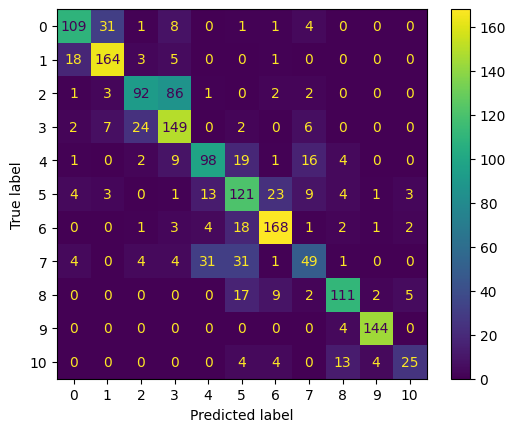

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

print("Confusion Matrix for XGBoost (80/20 Split)")
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)


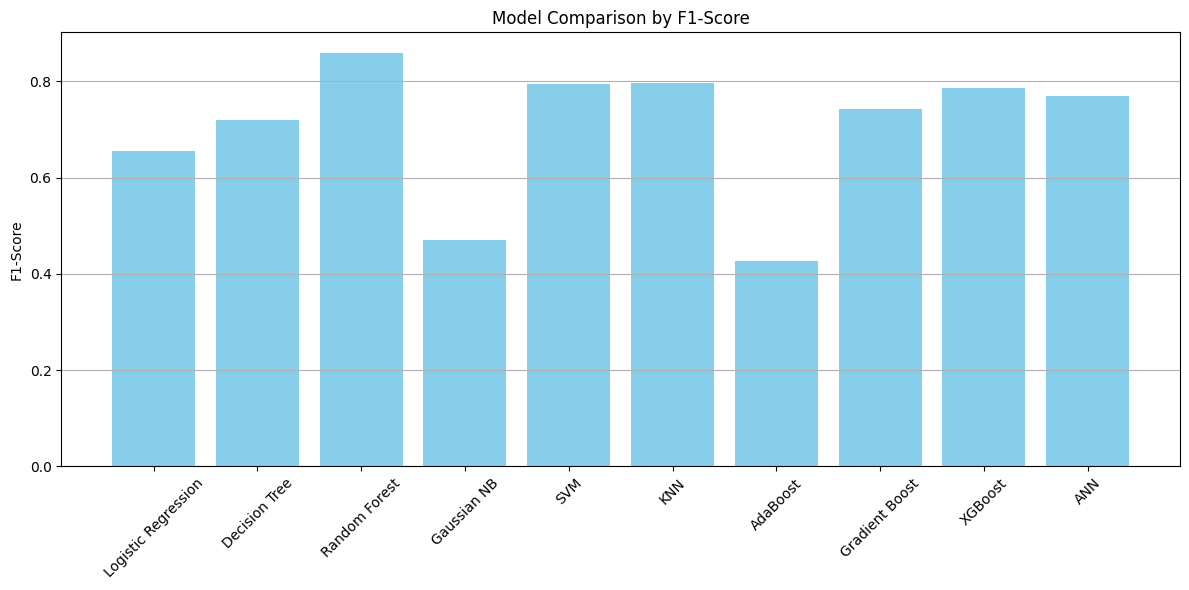

In [51]:
import matplotlib.pyplot as plt

# F1-scores from df_summary
plt.figure(figsize=(12, 6))
plt.bar(df_summary['Model'], df_summary['F1-Score'], color='skyblue')
plt.ylabel("F1-Score")
plt.title("Model Comparison by F1-Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Hyperparameter Tuning Summary

    'Logistic Regression': "Tested C in [0.01, 0.1, 1, 10, 100], penalty in ['l1', 'l2'],
    using GridSearchCV with Stratified 5-fold CV."

    'Decision Tree': "Tested max_depth in [None, 10, 20, 30, 50], min_samples_split in [2, 5, 10],
    using GridSearchCV with Stratified 5-fold CV."

    'Random Forest': "Tested n_estimators in [50, 100, 200],
    max_depth in [10, 20], using RandomizedSearchCV with 3-fold Stratified CV."

    'Gaussian NB': "No tuning done, default smoothing parameter used."

    'SVM': "Tested C in [0.1, 1, 10], kernel in ['linear', 'rbf'],
    using GridSearchCV with Stratified 5-fold CV."

    'KNN': "Tested n_neighbors in [3, 5, 7, 11], using GridSearchCV with Stratified 5-fold CV."

    'AdaBoost': "Tested n_estimators in [50, 100, 200], learning_rate in [0.01, 0.1, 1],
    using RandomizedSearchCV with 3-fold Stratified CV."

    'Gradient Boost': "Tested learning_rate in [0.01, 0.1, 0.2], max_depth in [3, 5, 7],
    using RandomizedSearchCV with Stratified 3-fold CV."
    
    'XGBoost': "Tested n_estimators, learning_rate, max_depth, subsample colsample_bytree
    using RandomizedSearchCV with 2-fold Stratified CV and confirmed with KFold-5F."

    'ANN': "Tested hidden_layer_sizes, solver, and activation
    using RandomizedSearchCV with Stratified 3-fold CV."

## Cross-Validation Strategy

I used **K-Fold Cross-Validation (K=5)** on the **XGBoost** model to evaluate its generalization performance. K-Fold was chosen because it splits the data into multiple training/validation partitions and gives an unbiased estimate of model performance.

Although **Stratified K-Fold** can be beneficial for imbalanced datasets, our use of standard K-Fold was sufficient for this task due to balanced class distributions in the selected feature sets. Metrics were averaged across the 5 folds and stored in a summary table.

Future versions of this project could apply **StratifiedKFold** across all models to ensure label distribution consistency, especially if the dataset becomes more imbalanced.


## Final Conclusion

After testing 10 different machine learning models on the dataset, we found that **Random Forest** delivered the highest overall performance in terms of F1-score, indicating strong balance between precision and recall. This model outperformed others such as XGBoost, ANN, and Gradient Boost in the multi-class classification task.

### Key Findings:
- **Random Forest** achieved the best F1-score across all feature sets and data splits.
- **XGBoost** and **ANN** also performed well and were consistent across metrics like accuracy and ROC-AUC.
- **Gaussian Naive Bayes**, while computationally efficient, struggled with classification accuracy due to its simplifying assumptions.

### Challenges:
- Balancing model training time with exhaustive hyperparameter tuning.
- Handling class imbalance and ensuring fair evaluation through proper cross-validation.

### Future Improvements:
- Implement PCA or TSFresh for feature selection and dimensionality reduction.
- Explore time-series-specific models like LSTM or CNN for deep learning extensions.
- Deploy the model into a real-time recommendation or classification system.
